<a href="https://colab.research.google.com/github/MargoNupreichik/DS_jobs_salaries_analysis/blob/main/ds_job_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%autosave 60

Autosaving every 60 seconds


In [1]:
# код для загрузки и распаковки датасета
# !pip install -q kaggle
#
# from google.colab import files
# files.upload()
#
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
#
# !cat ~/.kaggle/kaggle.json
#
# %cd /content/drive/MyDrive/data
#
# ! kaggle datasets download -d abhinavshaw09/data-science-job-salaries-2024
#
# path = '/content/drive/MyDrive/data/'
# import zipfile
# with zipfile.ZipFile(path+'data-science-job-salaries-2024.zip', 'r') as zip_ref:
#   zip_ref.extractall(path)

## Поставленная задача - регрессия.
По признакам определить уровень з/п специалиста. Цель - salary_in_usd.

In [3]:
import pandas as pd
path = '/content/drive/MyDrive/data/'
df = pd.read_csv(path+'salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


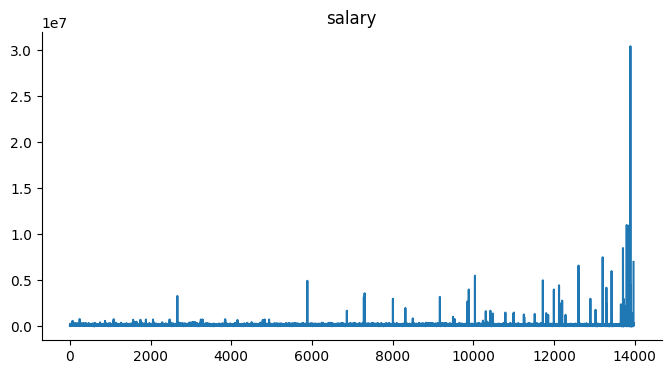

In [4]:
# The total gross salary amount paid.
# @title salary

from matplotlib import pyplot as plt
df['salary'].plot(kind='line', figsize=(8, 4), title='salary')
plt.gca().spines[['top', 'right']].set_visible(False)

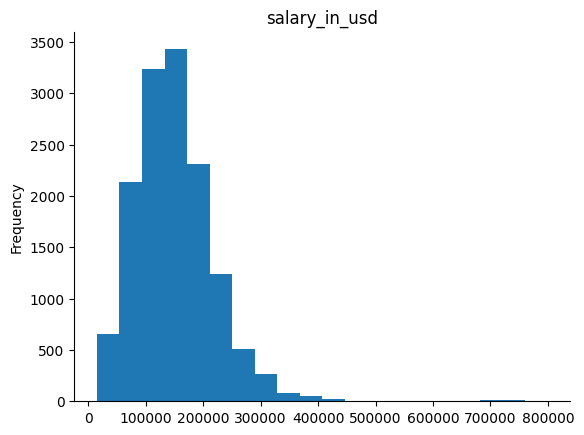

In [5]:
# The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
# @title salary_in_usd

from matplotlib import pyplot as plt
df['salary_in_usd'].plot(kind='hist', bins=20, title='salary_in_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
# предобработка данных
# категориальные признаки:
# [experience_level,	employment_type,	job_title, employee_residence,	company_location, company_size]

# просмотр уникальных значений по категориальным признакам
categories = ['experience_level',	'employment_type',	'job_title', 'employee_residence',
              'company_location', 'company_size']
for col in df:
  if col in categories:
   print(col, df[col].unique(), sep=' ')

experience_level ['SE' 'MI' 'EN' 'EX']
employment_type ['FT' 'CT' 'PT' 'FL']
job_title ['AI Engineer' 'Machine Learning Engineer'
 'Business Intelligence Developer' 'Data Engineer' 'Data Scientist'
 'Cloud Database Engineer' 'Research Engineer' 'Data Analyst'
 'Machine Learning Scientist' 'Applied Scientist' 'Data Science Manager'
 'Research Scientist' 'Prompt Engineer' 'Data Science'
 'Data Science Consultant' 'Data Management Analyst' 'Research Analyst'
 'Data Operations Analyst' 'Data Management Consultant'
 'Business Intelligence Analyst' 'Analytics Engineer'
 'Data Quality Analyst' 'Data Architect' 'Data Manager' 'ML Engineer'
 'Robotics Software Engineer' 'Machine Learning Researcher' 'AI Architect'
 'Data DevOps Engineer' 'Business Intelligence' 'AI Software Engineer'
 'Data Integration Engineer' 'Data Operations Specialist' 'BI Analyst'
 'Data Product Manager' 'Business Intelligence Engineer' 'Data Specialist'
 'AI Research Scientist' 'Data Science Director' 'Data Strategist'
 

<Axes: >

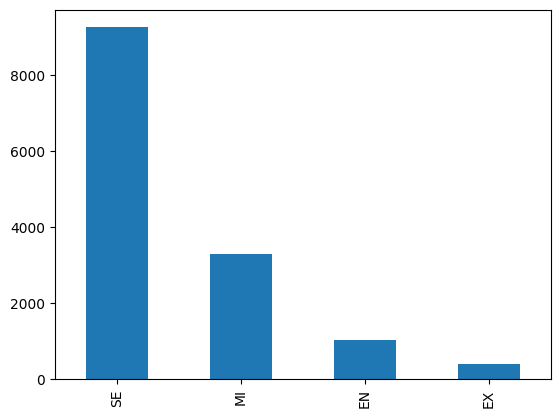

In [7]:
# графики: частота встречи каждого типа в каждом столбце
df['experience_level'].value_counts().plot.bar()

<Axes: >

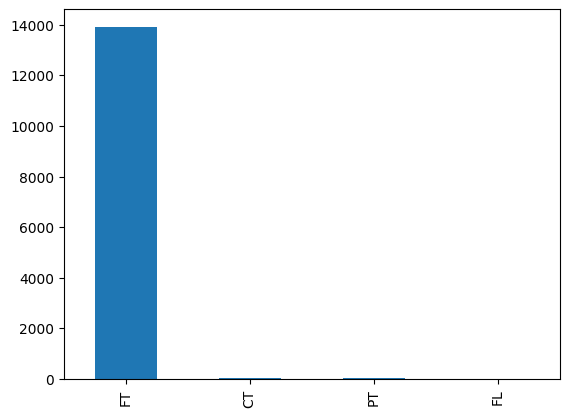

In [8]:
df['employment_type'].value_counts().plot.bar()

<Axes: >

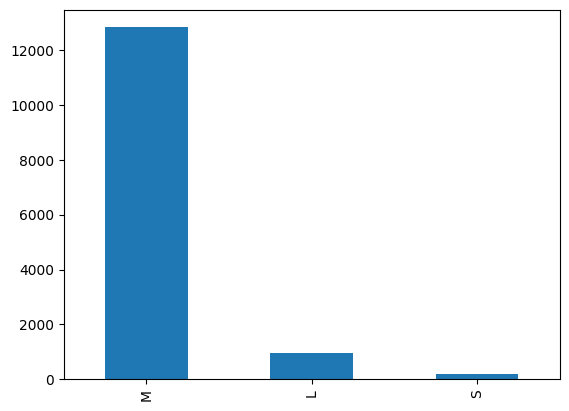

In [9]:
df['company_size'].value_counts().plot.bar()

In [10]:
from pandas.api.types import is_string_dtype

def preprocessing_data(df):

  def create_dict(df, col_title):
    title_list = df[col_title].unique()
    title_dict = dict(zip(title_list, [0]*len(title_list)))
    summary = df[col_title].count()

    for i in range(len(title_list)):
      val = len(df[df[col_title] == title_list[i]])
      title_dict.update({title_list[i]: float(val/summary)})

    return title_dict

  def categorical_to_numerical(df, col_name):
    item_dict = create_dict(df, col_name)

    def collate(a):
      if a in list(item_dict.keys()):
        a = item_dict[a]
      return a

    df[col_name] = df[col_name].apply(collate)
    return df

  features = list(df.columns)
  categorical_features = []
  for i in features:
    if is_string_dtype(df[i]):
      categorical_features.append(i)

  for feature in categorical_features:
    df = categorical_to_numerical(df, feature)
  return df

preprocessing_data(df)
df.head(n=10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,0.661895,0.995706,0.006370,90000,0.921557,90000,0.000286,0,0.000286,0.068924
1,2024,0.661895,0.995706,0.104924,180500,0.921557,180500,0.871099,0,0.874606,0.918337
2,2024,0.661895,0.995706,0.104924,96200,0.921557,96200,0.871099,0,0.874606,0.918337
3,2024,0.661895,0.995706,0.104924,235000,0.921557,235000,0.003292,0,0.003507,0.918337
4,2024,0.661895,0.995706,0.104924,175000,0.921557,175000,0.003292,0,0.003507,0.918337
5,2024,0.235757,0.995706,0.003507,95413,0.921557,95413,0.871099,100,0.874606,0.918337
6,2024,0.235757,0.995706,0.003507,70692,0.921557,70692,0.871099,100,0.874606,0.918337
7,2024,0.661895,0.995706,0.215932,110000,0.921557,110000,0.000787,0,0.000716,0.918337
8,2024,0.661895,0.995706,0.215932,48000,0.921557,48000,0.000787,0,0.000716,0.918337
9,2024,0.661895,0.995706,0.205697,222300,0.921557,222300,0.871099,0,0.874606,0.918337


<Axes: >

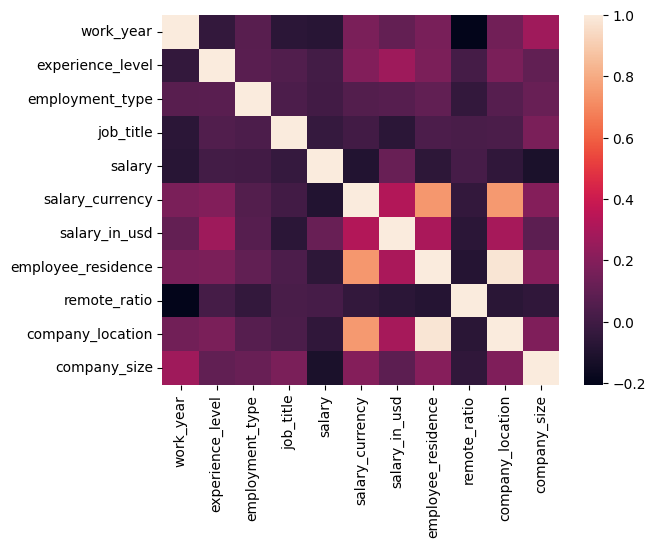

In [11]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Сильная корреляция валюты зарплаты с гражданством рабочего и местонахождением компании (вполне логично).
  
    
Параметры, которые коррелируют с интересующим нас параметром: experience_level, salary_currency, employee_residence, company_location.

In [12]:
# разделение выборки на тренировочную и тестовую

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
9520,2023,0.235757,0.995706,0.215932,52500,0.921557,52500,0.871099,0,0.874606
13241,2022,0.661895,0.995706,0.215932,195700,0.921557,195700,0.871099,0,0.874606
355,2024,0.235757,0.995706,0.148798,52100,0.921557,52100,0.871099,0,0.874606
1429,2024,0.235757,0.995706,0.215932,146100,0.921557,146100,0.871099,0,0.874606
7852,2023,0.661895,0.995706,0.031563,248100,0.921557,248100,0.871099,0,0.874606


In [14]:
train_answ = X_train['salary_in_usd'].copy(deep = True)
X_train = X_train.drop('salary_in_usd', axis=1)
test_answ = X_test['salary_in_usd'].copy(deep = True)
X_test = X_test.drop('salary_in_usd', axis=1)

train_answ.head()

9520      52500
13241    195700
355       52100
1429     146100
7852     248100
Name: salary_in_usd, dtype: int64